In [3]:
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets

## E1 - Examining Potential

In [12]:
EJ, EC, EL = (4, 1, 1)

def flux_potential(phi, phi_ext = 0, n = 0, EJ = EJ, EC = EC, EL = EL):
    return - EJ * np.cos(phi) + 1 / 2 * EL * (phi + phi_ext) ** 2


# Define a function that creates a simple plot
def create_plot(phi_external):
    x = np.linspace(- 2 * np.pi, 2 * np.pi, 100)
    y = flux_potential(x, phi_external)
    plt.plot(x, y)
    plt.show()


widgets.interact(create_plot, phi_external=(- np.pi, np.pi, 0.01))



interactive(children=(FloatSlider(value=-0.0015926535897929917, description='phi_external', max=3.141592653589…

<function __main__.create_plot(phi_external)>

In [13]:
def create_plot(phi_external):
    x = np.linspace(- 2 * np.pi, 2 * np.pi, 100)
    y = flux_potential(x - phi_external, phi_external)
    plt.plot(x, y)
    plt.show()


widgets.interact(create_plot, phi_external=(- np.pi, np.pi, 0.01))
 


interactive(children=(FloatSlider(value=-0.0015926535897929917, description='phi_external', max=3.141592653589…

<function __main__.create_plot(phi_external)>

## E2 - Analysis of FLuxonium Circuit

In [81]:
from scipy.sparse import diags, csr_matrix

In [82]:
# We want to define it in the Flux basis 
flux_cutoff = 4 * np.pi
resolution  = 100

phis = np.linspace(- flux_cutoff, flux_cutoff, resolution)

EJ, EC, EL = (4, 1, 1)

def flux_potential(phi, phi_ext = 0, n = 0, EJ = EJ, EC = EC, EL = EL):
    return - EJ * np.cos(phi) + 1 / 2 * EL * (phi + phi_ext) ** 2

# Coordinate chaged matrix
def potential_matrix(phi_external):
    return diags(flux_potential(phis - phi_external, phi_external), 0, format = 'csr')
# potential_matrix = diags(flux_potential(phis), 0, format = 'csr')

def diff_diff_conjugate_matrix(n = resolution, delta = flux_cutoff / resolution, cyclic = False):
    diag            = - 2 * np.ones(n)
    diag            = diags(diag)
    off_diag        = np.ones(n - 1)
    upper           = diags(off_diag,   -1, format = "csr" )
    lower           = diags(off_diag,   1,  format = "csr"   )

    if cyclic:
        upper[0, -1] = 1
        lower[-1, 0] = 1

    return - (1)/(delta ** 2) * (diag + upper + lower)


def get_Hamiltonian(phi_ext = 0, EJ = EJ, EC = EC, EL = EL):
    return potential_matrix(phi_ext) + 4  * EC * diff_diff_conjugate_matrix(cyclic = True)



In [83]:
from scipy.sparse.linalg import eigsh

def get_eigenvalues_for_flux(external_flux):
    H  = get_Hamiltonian(external_flux)
    Es, _ = eigsh(H, k = 3, which = 'SA', return_eigenvectors = True)
    return Es 
    
eigenvalues = []
external_phis = np.linspace(0, 2 * np.pi, 100) 

for ext_phi in external_phis:
    eigenvalues.append(get_eigenvalues_for_flux(ext_phi))

eigenvalues = np.array(eigenvalues)

/home/johannseverin/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


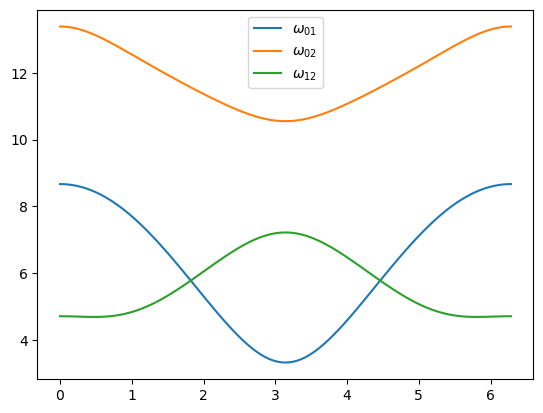

In [84]:
E0, E1, E2 = eigenvalues[:, 0], eigenvalues[:, 1], eigenvalues[:, 2]
plt.plot(external_phis, E1 - E0, label = "$\omega_{01}$")
plt.plot(external_phis, E2 - E0, label = "$\omega_{02}$")
plt.plot(external_phis, E2 - E1, label = "$\omega_{12}$")

plt.legend()

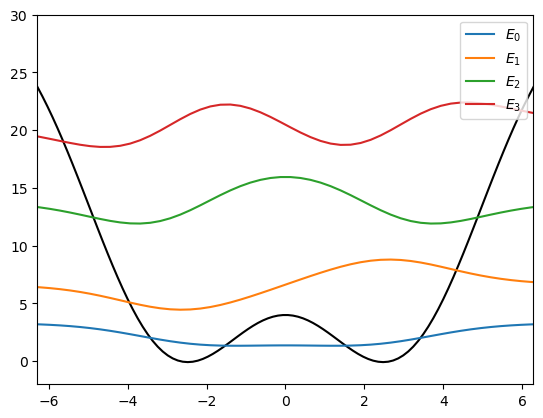

In [97]:
external_phi = np.pi
phis_plot    = np.linspace(- 2 * np.pi, 2 * np.pi, 100)
pot          = flux_potential(phis_plot - external_phi, external_phi)

plt.plot(phis_plot, pot, color = "k")

H = get_Hamiltonian(external_phi)
Es, Vs = eigsh(H, k = 4, which = 'SA', return_eigenvectors = True)

for i in range(4):
    plt.plot(phis, Vs[:, i] * 10 + Es[i], label = f"$E_{i}$")

plt.ylim(-2, 30)
plt.xlim(-2 * np.pi, 2 * np.pi)

plt.legend(loc = "upper right")